In [1]:

import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from IPython.display import display 

# Pretty display for notebooks
%matplotlib inline
pd.set_option('display.max_colwidth', -1)

data_2017 = pd.read_csv("datasets/Base_De_Datos_PQRD_2017.csv.gz", compression='gzip')
data_2016 = pd.read_csv("datasets/Base_De_Datos_PQRD_2016.csv.gz", compression='gzip')
data_2015 = pd.read_csv("datasets/Base_De_Datos_PQRD_2015.csv.gz", compression='gzip')


/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,10,12,13,14,15,16,17,18,19,20,22,23,29,32,33,35,46,47,48,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,24,25,26,27,28,30,31,33,34,36,37,39,41,43,44,45,46,47,48,49,50,51,52,53,54,56,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
from functools import reduce

colums_2017 = data_2017.columns.values
colums_2016 = data_2016.columns.values
colums_2015 = data_2015.columns.values
ds_columns = reduce(np.intersect1d, (colums_2017, colums_2016, colums_2015))


In [3]:
data = data_2017[ds_columns]
data = data.append(data_2016[ds_columns])
data = data.append(data_2015[ds_columns])

labels_raw = data[['RIESGO_VIDA']]
features_raw = data.drop(['RIESGO_VIDA'], axis = 1)
display(data.head(n = 5))


,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,PET_MPIO,PET_TIPOPER,PQR_CANAL,PQR_CLASE_SNS,PQR_ESTADO,PQR_GRUPOALERTA,PQR_TIPOATENCION,PQR_TIPOPETICION,RIESGO_VIDA,TRIM
0,BOGOTA D.C.,DE 13 A 17 AÑOS,Ninguno,Mujer,No aplica,BOGOTÁ,Otro,No aplica,Subsidiado,Natural,...,BOGOTÁ,Juridica,Escrito,PQR,Cerrado,0,PETICION DIRECTA,Reclamo,NO,Trim I
1,NARIÑO,DE 0 A 5 AÑOS,Ninguno,Hombre,No aplica,PUERRES,Otro,No aplica,Subsidiado,Natural,...,PUERRES,Natural,Telefonico,PQR,Cerrado,0,0,Reclamo,NO,Trim I
2,VALLE,DE 13 A 17 AÑOS,Secundaria,Hombre,No aplica,CALI,Abuelo (a),No aplica,Contributivo,Natural,...,CALI,Natural,Telefonico,PQR,Cerrado,0,0,Reclamo,NO,Trim I
3,HUILA,DE 13 A 17 AÑOS,Universitario Incompleto,Hombre,No aplica,NEIVA,Padre,No aplica,Contributivo,Natural,...,NEIVA,Natural,Personalizado,PQR,Cerrado,0,0,Reclamo,NO,Trim I
4,RISARALDA,DE 13 A 17 AÑOS,Ninguno,Hombre,No aplica,DOSQUEBRADAS,Padre,Persona en Condición de Discapacidad,Contributivo,Natural,...,DOSQUEBRADAS,Natural,Personalizado,PQR,Pendiente (Avance),0,0,Reclamo,SI,Trim I


In [4]:
print(data.shape)

(2375371, 46)


In [5]:
def getFeaturesDistribution(features):
    dfColumns = pd.DataFrame(columns=['Feature','Distinct Values'])
    for colName in features.columns.values:
        dfColumns = dfColumns.append({'Feature': colName, 'Distinct Values': features[colName].unique().size}, ignore_index=True)
    return dfColumns.infer_objects()

def showFeaturesDistribution(dfColumns):
    dfFeatures = dfColumns.copy(deep=True)
    dfFeatures.set_index("Feature",drop=True,inplace=True)
    dfFeatures.plot( kind='bar', figsize = (15,5))
    


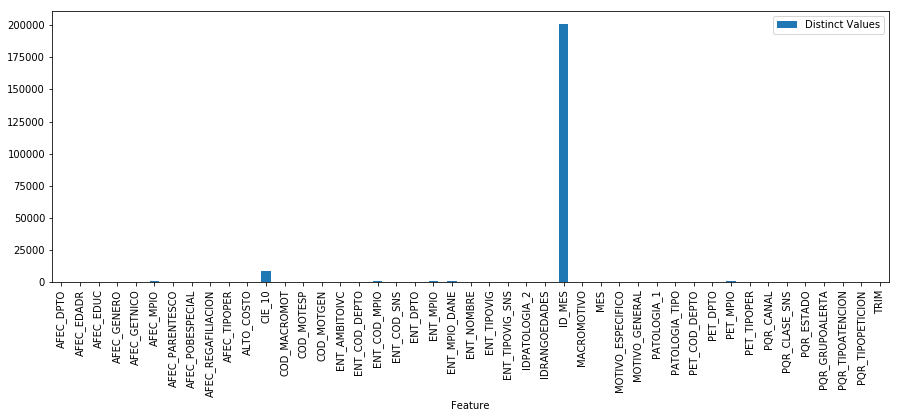

In [6]:

showFeaturesDistribution(getFeaturesDistribution(features_raw))

| Feature            | Distinct Values | Type        | Description                                                                       |
|--------------------|-----------------|-------------|-----------------------------------------------------------------------------------|
| AFEC_DPTO          | 39              | Categorical | State name where patient lives                                                    |
| AFEC_EDADR         | 11              | Categorical | Patient's age range                                                               |
| AFEC_EDUC          | 10              | Categorical | Patient's education level                                                         |
| AFEC_GENERO        | 4               | Categorical | Patient's genre                                                                   |
| AFEC_GETNICO       | 10              | Categorical | Patient's ethnic group                                                            |
| AFEC_MPIO          | 1299            | Categorical | City/Town where the patient lives                                                 |
| AFEC_PARENTESCO    | 18              | Categorical | Kinship from the person whose raises the PQRD                                     |
| AFEC_POBESPECIAL   | 10              | Categorical | Special social group                                                              |
| AFEC_REGAFILIACION | 7               | Categorical | Patient's Affiliation Regime                                                      |
| AFEC_TIPOPER       | 4               | Categorical | Kind of person (Natural or Legal)                                                 |
| ALTO_COSTO         | 23              | Categorical | Descriptions for high cost cases                                                  |
| CIE_10             | 9029            | Categorical | International Classification of Diseases, 10th Revision (ICD-10)                  |
| COD_MACROMOT       | 9               | Categorical | Macro reason code for PQRD                                                        |
| COD_MOTESP         | 324             | Categorical | Specific reason code for PQRD                                                     |
| COD_MOTGEN         | 44              | Categorical | General reason code for PQRD                                                      |
| ENT_AMBITOIVC      | 33              | Categorical | Category code of entity that supervises the health institution receiving the PQRD |
| ENT_COD_DEPTO      | 35              | Categorical | State code for the health institution receiving the PQRD                          |
| ENT_COD_MPIO       | 1119            | Categorical | City code for the health institution receiving the PQRD                           |
| ENT_COD_SNS        | 107             | Categorical | Code for the health institution receiving the PQRD                                |
| ENT_DPTO           | 36              | Categorical | State name for the health institution receiving the PQRD                          |
| ENT_MPIO           | 1349            | Categorical | City name for the health institution receiving the PQRD                           |
| ENT_MPIO_DANE      | 1037            | Categorical | City name for the health institution receiving the PQRD (DANE code)               |
| ENT_NOMBRE         | 250             | Categorical | Name of the health institution receiving the PQRD                                 |
| ENT_TIPOVIG        | 30              | Categorical | Category name of entity that supervises the health institution receiving the PQRD |
| ENT_TIPOVIG_SNS    | 14              | Categorical | Category name of entity that supervises the health institution receiving the PQRD |
| IDPATOLOGIA_2      | 457             | Categorical | N / A. Disease Code?                                                              |
| IDRANGOEDADES      | 10              | Categorical | Internal database code, not for statistical use.                                  |
| ID_MES             | 201179          | Categorical | Internal database code, not for statistical use.                                  |
| MACROMOTIVO        | 11              | Categorical | Macro reason name for PQRD                                                        |
| MES                | 13              | Categorical | Month code for PQRD                                                               |
| MOTIVO_ESPECIFICO  | 336             | Categorical | Specific reason name for PQRD                                                     |
| MOTIVO_GENERAL     | 44              | Categorical | General reason code for PQRD                                                      |
| PATOLOGIA_1        | 24              | Categorical | Pathology name                                                                    |
| PATOLOGIA_TIPO     | 554             | Categorical | Pathology specific name                                                           |
| PET_COD_DEPTO      | 34              | Categorical | State code for the location of the person who raises the PQRD                     |
| PET_DPTO           | 39              | Categorical | State name for the location of the person who raises the PQRD                     |
| PET_MPIO           | 1291            | Categorical | City name for the location of the person who raises the PQRD                      |
| PET_TIPOPER        | 4               | Categorical | Person category (Natural or Legal)                                                |
| PQR_CANAL          | 14              | Categorical | Channel used to raise the PQRD (phone call, email, etc)                           |
| PQR_CLASE_SNS      | 4               | Categorical | PQRD Category                                                                     |
| PQR_ESTADO         | 10              | Categorical | PQRD current state                                                                |
| PQR_GRUPOALERTA    | 4               | Categorical | Internal database code, not for statistical use.                                  |
| PQR_TIPOATENCION   | 8               | Categorical | PQRD sub category                                                                 |
| PQR_TIPOPETICION   | 7               | Categorical | PQRD sub category                                                                 |
| RIESGO_VIDA        | 4               | Categorical | Indicates if is the PQRD is about life at risk                                    |
| TRIM               | 6               | Categorical | Quarter                                                                           |

## Removing fields

Acording to the oficial documentation, fields "IDRANGOEDADES", "ID_MES" and "PQR_GRUPOALERTA" have not statistical use, so they are removed from the dataset.

On the other hand, the feature "PQR_ESTADO" that have significant statistical value that may bias the model. Once a PQRS enters the system, it goes through a series of states before the case is closed. First, Historycally, patients with life at risk can have a tendency to have a certain state or a relationship with and another feature (i.e patient's with life at risk may have most of their states as closed as they may have priority over other cases), so including "PQR_ESTADO" will make the model to make predictions over a feature that will not be statiastic relevant when introducing a new PQRS (When a new PQRS enters the system it will have a default state that is very unlikely to have the final state from the original data set).



In [7]:
unused_features = data[['IDRANGOEDADES', 'ID_MES', 'PQR_GRUPOALERTA']]

data = data.drop(['IDRANGOEDADES', 'ID_MES', 'PQR_GRUPOALERTA', 'PQR_ESTADO'], axis = 1)
data = data.applymap(str)

labels_raw = data[['RIESGO_VIDA']]
features_raw = data.drop(['RIESGO_VIDA'], axis = 1)

dfFeaturesClean = pd.DataFrame(columns=['Feature','Distinct Values'])

for colName in data.columns.values:
    dfFeaturesClean = dfFeaturesClean.append({'Feature': colName, 'Distinct Values': data[colName].unique().size}, ignore_index=True)
dfFeaturesClean = dfFeaturesClean.infer_objects()
display(dfFeaturesClean.head(n = 5))

,Feature,Distinct Values
0,AFEC_DPTO,38
1,AFEC_EDADR,10
2,AFEC_EDUC,9
3,AFEC_GENERO,3
4,AFEC_GETNICO,9


In [8]:

data_columns = data.columns.values.tolist()
for column in data_columns:
    data[column] = data[column].apply(lambda s: s.decode('utf-8').lower())
display(data.head(n = 5))

,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,PET_COD_DEPTO,PET_DPTO,PET_MPIO,PET_TIPOPER,PQR_CANAL,PQR_CLASE_SNS,PQR_TIPOATENCION,PQR_TIPOPETICION,RIESGO_VIDA,TRIM
0,bogota d.c.,de 13 a 17 años,ninguno,mujer,no aplica,bogotá,otro,no aplica,subsidiado,natural,...,11,bogota d.c.,bogotá,juridica,escrito,pqr,peticion directa,reclamo,no,trim i
1,nariño,de 0 a 5 años,ninguno,hombre,no aplica,puerres,otro,no aplica,subsidiado,natural,...,52,nariño,puerres,natural,telefonico,pqr,0,reclamo,no,trim i
2,valle,de 13 a 17 años,secundaria,hombre,no aplica,cali,abuelo (a),no aplica,contributivo,natural,...,76,valle,cali,natural,telefonico,pqr,0,reclamo,no,trim i
3,huila,de 13 a 17 años,universitario incompleto,hombre,no aplica,neiva,padre,no aplica,contributivo,natural,...,41,huila,neiva,natural,personalizado,pqr,0,reclamo,no,trim i
4,risaralda,de 13 a 17 años,ninguno,hombre,no aplica,dosquebradas,padre,persona en condición de discapacidad,contributivo,natural,...,66,risaralda,dosquebradas,natural,personalizado,pqr,0,reclamo,si,trim i


## Clean dataset


Some of the categories have a documented domain constrain values, these values can be found at fields_values.csv. The method eval_feature_values checks if there are records that do not complain with the expected value. Values are update in case there's a typo in one of the classes to avoid duplicates.


In [9]:
#fields_values = pd.read_csv("datasets/fields_values.csv").to_dict('records')
#fields_values = {k:v.split('|') for (k,v) in fields_values}
fields_values = {}
for index, row in pd.read_csv("datasets/fields_values.csv").iterrows():
    values = map(lambda value: value.decode('utf-8').lower(), row['domain'].split('|'))
    fields_values[row['column']] = values

#Iterate columns with known domain constrain values
for column_name in data_columns: 
    if column_name in fields_values:
        # Get columns values
        columnValues = data[[column_name]].drop_duplicates().sort_values(by=[column_name])
        columnValues = columnValues[column_name].values.tolist()
        # Get dataset field values
        fieldValues = fields_values[column_name]
        # Print values that do not complain with default values
        print("%s: %s" % (column_name, list(set(columnValues) - set(fieldValues))))


AFEC_EDADR: [u'0']
AFEC_EDUC: [u'0']
AFEC_GENERO: [u'0']
AFEC_GETNICO: [u'0']
AFEC_PARENTESCO: [u'0']
AFEC_POBESPECIAL: [u'0', u'violencia de genero']
AFEC_REGAFILIACION: [u'0']
AFEC_TIPOPER: [u'0']
MES: [u'0']
PET_TIPOPER: [u'0']
PQR_CANAL: [u'0', u'telefonico']
PQR_TIPOATENCION: [u'0', u'traslado interno']
PQR_TIPOPETICION: [u'peticion de informacion', u'0', u'queja (funcionario de la supersalud)', u'reclamo ', u'consulta y/o solicitud de informacion']
RIESGO_VIDA: [u'0']
TRIM: [u'0', u'trim i']


### Explore features - AFEC_POBESPECIAL

In [10]:
display(data[['AFEC_POBESPECIAL']].drop_duplicates().sort_values(by=['AFEC_POBESPECIAL']))

,AFEC_POBESPECIAL
119,0
192,desplazado
8619,habitante de la calle
10,mujer en estado de gestación
0,no aplica
4,persona en condición de discapacidad
897,población carcelaria (presos)
81807,trabajador sexual
464,violencia de genero


### Explore features - PQR_CANAL

In [11]:
display(data[['PQR_CANAL']].drop_duplicates().sort_values(by=['PQR_CANAL']))

,PQR_CANAL
793434,0
24,chat
59,correo
0,escrito
3,personalizado
1,telefonico
10,web


In [12]:
display(list(data[['PQR_CANAL']].drop_duplicates().astype(str).values.flatten()))

['escrito', 'telefonico', 'personalizado', 'web', 'chat', 'correo', '0']

### Explore features - PQR_TIPOATENCION

In [13]:
display(data[['PQR_TIPOATENCION']].drop_duplicates().sort_values(by=['PQR_TIPOATENCION']))

,PQR_TIPOATENCION
1,0
110448,consulta de orientacion
61,copia informativa
0,peticion directa
228,reiterativo
65,traslado externo
3280,traslado interno


### Explore features - PQR_TIPOPETICION

In [14]:
display(data[['PQR_TIPOPETICION']].drop_duplicates().sort_values(by=['PQR_TIPOPETICION']))

,PQR_TIPOPETICION
793434,0
403657,consulta y/o solicitud de informacion
6185,peticion de informacion
1574,queja (funcionario de la supersalud)
0,reclamo
89,seguimiento a cumplimiento fallos de tutela


### Explore features - TRIM

In [15]:
display(data[['TRIM']].drop_duplicates().sort_values(by=['TRIM']))

,TRIM
793434,0
0,trim i
113076,trim ii
220476,trim iii
332396,trim iv


### Explore features - RIESGO_VIDA

In [16]:
data = data[data.RIESGO_VIDA != '0']

## Special cases: AFEC_DPTO, ENT_DPTO

States names can take similar names for a same state, and given that there are relatively few states, it's possible to manually fix these values to avoid duplicates in classe values.

Some features are writen in different ways, for example, 'ARCHIPIELAGO DE SAN ANDRES, PROVIDENCIA Y SANTA CATALINA', 'SAN ANDRES' and 'SAN ANDRÉS' are the same state. Same for 'BOGOTA D.C' and 'BOGOTA D.C.'

### Explore features - AFEC_DPTO

In [17]:
display(data[['AFEC_DPTO']].drop_duplicates().sort_values(by=['AFEC_DPTO']))

,AFEC_DPTO
86,0
1026,amazonas
10,antioquia
135,arauca
4057,"archipielago de san andres, providencia y santa catalina"
11,atlantico
9,bogota d.c
0,bogota d.c.
92,bolivar
77,boyaca


In [18]:

#data['AFEC_DPTO'] = np.where(data['AFEC_DPTO'] == 'ARCHIPIELAGO DE SAN ANDRES, PROVIDENCIA Y SANTA CATALINA' | data['AFEC_DPTO'] == 'SAN ANDRÉS', 'SAN ANDRES',data['AFEC_DPTO'])
data['AFEC_DPTO']  = data['AFEC_DPTO'].apply(lambda s: 'san andres' if s == 'archipielago de san andres, providencia y santa catalina' or s == 'san andrés'.decode('utf-8') else s)
data['AFEC_DPTO']  = data['AFEC_DPTO'].apply(lambda s: 'bogota d.c.' if s == 'bogota d.c' else s)

display(data[['AFEC_DPTO']].drop_duplicates().sort_values(by=['AFEC_DPTO']))


,AFEC_DPTO
86,0
1026,amazonas
10,antioquia
135,arauca
11,atlantico
0,bogota d.c.
92,bolivar
77,boyaca
5,caldas
522,caqueta


### Explore features - ENT_DPTO

In [19]:
display(data[['ENT_DPTO']].drop_duplicates().sort_values(by=['ENT_DPTO']))

,ENT_DPTO
58337,(sin información)
86038,0
974,amazonas
24,antioquia
135,arauca
10,atlantico
6,bogota d.c.
92,bolivar
43,boyaca
5,caldas


### Explore features - PET_DPTO

In [20]:
display(data[['PET_DPTO']].drop_duplicates().sort_values(by=['PET_DPTO']))

,PET_DPTO
86,0
1026,amazonas
10,antioquia
135,arauca
4057,"archipielago de san andres, providencia y santa catalina"
11,atlantico
9,bogota d.c
0,bogota d.c.
56,bolivar
77,boyaca


In [21]:
data['PET_DPTO']  = data['PET_DPTO'].apply(lambda s: 'san andres' if s == 'archipielago de san andres, providencia y santa catalina' or s == 'san andrés'.decode('utf-8') else s)
data['PET_DPTO']  = data['PET_DPTO'].apply(lambda s: 'bogota d.c.' if s == 'bogota d.c' else s)

display(data[['PET_DPTO']].drop_duplicates().sort_values(by=['PET_DPTO']))


,PET_DPTO
86,0
1026,amazonas
10,antioquia
135,arauca
11,atlantico
0,bogota d.c.
56,bolivar
77,boyaca
5,caldas
522,caqueta


In [22]:
pd.set_option('display.max_columns', 500)
display(data.head(n = 4))

,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,ALTO_COSTO,CIE_10,COD_MACROMOT,COD_MOTESP,COD_MOTGEN,ENT_AMBITOIVC,ENT_COD_DEPTO,ENT_COD_MPIO,ENT_COD_SNS,ENT_DPTO,ENT_MPIO,ENT_MPIO_DANE,ENT_NOMBRE,ENT_TIPOVIG,ENT_TIPOVIG_SNS,IDPATOLOGIA_2,MACROMOTIVO,MES,MOTIVO_ESPECIFICO,MOTIVO_GENERAL,PATOLOGIA_1,PATOLOGIA_TIPO,PET_COD_DEPTO,PET_DPTO,PET_MPIO,PET_TIPOPER,PQR_CANAL,PQR_CLASE_SNS,PQR_TIPOATENCION,PQR_TIPOPETICION,RIESGO_VIDA,TRIM
0,bogota d.c.,de 13 a 17 años,ninguno,mujer,no aplica,bogotá,otro,no aplica,subsidiado,natural,0,otra atención médica,1,10115,101,otros,63,63130,epss03,quindio,calarca,calarca,cafesalud,regimen subsidiado,regimen subsidiado,0.0,restriccion en el acceso a los servicios de salud,1,falta de oportunidad para la prestacion de servicios de laboratorio clinico y anatomo-patologia,restriccion en el acceso por falta de oportunidad para la atencion,problemas relacionados con facilidades de atencion medica u otros servicios de salud,problemas relacionados con facilidades de atencion medica u otros servicios de salud,11,bogota d.c.,bogotá,juridica,escrito,pqr,peticion directa,reclamo,no,trim i
1,nariño,de 0 a 5 años,ninguno,hombre,no aplica,puerres,otro,no aplica,subsidiado,natural,0,0,1,10109,101,0,52,52573,ess118,nariño,puerres,puerres,emssanar,regimen subsidiado,regimen subsidiado,0.0,restriccion en el acceso a los servicios de salud,1,falta de oportunidad en la asignacion de citas de consulta medica especializada de otras especialidades medicas,restriccion en el acceso por falta de oportunidad para la atencion,problemas relacionados con facilidades de atencion medica u otros servicios de salud,problemas relacionados con facilidades de atencion medica u otros servicios de salud,52,nariño,puerres,natural,telefonico,pqr,0,reclamo,no,trim i
2,valle,de 13 a 17 años,secundaria,hombre,no aplica,cali,abuelo (a),no aplica,contributivo,natural,0,"asma, no especificada",1,10314,103,0,76,76001,eps002,valle,cali,cali,salud total,regimen contributivo,regimen contributivo,0.0,restriccion en el acceso a los servicios de salud,1,demora de la autorizacion de examenes de laboratorio o diagnosticos,restriccion en el acceso por demoras en la autorizacion,problemas relacionados con facilidades de atencion medica u otros servicios de salud,problemas relacionados con facilidades de atencion medica u otros servicios de salud,76,valle,cali,natural,telefonico,pqr,0,reclamo,no,trim i
3,huila,de 13 a 17 años,universitario incompleto,hombre,no aplica,neiva,padre,no aplica,contributivo,natural,0,agentes virales como causa de enfermedades clasificadas en otros capítulos,1,10613,106,0,41,41001,eps016,huila,neiva,neiva,coomeva,regimen contributivo,regimen contributivo,0.0,restriccion en el acceso a los servicios de salud,1,barreras de acceso en la afiliacion (tramites no contemplados por la ley),restriccion en el acceso por fallas en la afiliacion,problemas relacionados con facilidades de atencion medica u otros servicios de salud,problemas relacionados con facilidades de atencion medica u otros servicios de salud,41,huila,neiva,natural,personalizado,pqr,0,reclamo,no,trim i


### Explore features - ALTO_COSTO

In [23]:
display(data[['ALTO_COSTO']].drop_duplicates().sort_values(by=['ALTO_COSTO']))

,ALTO_COSTO
0,0
2104,"alimento en polvo con vitaminas, hierro, zing, según guías oms para menores de 6 y 24 meses, según el criterio del médico o nutricionista tratante"
2420,cariotipo con fragilidad cromosómica para los menores de 18 años con diagnóstico de anemia aplásica congénita pediátrica
1446,diagnóstico y manejo del paciente infectado por vih
28530,díalisis peritoneal
39048,fórmula láctea para menores de 6 meses -hijos de vih positivas
5265,hemodiálisis
33799,implante coclear
1773,manejo de pacientes en unidades de cuidados intensivos
453,manejo del trauma mayor


# Feature's distribution

After cleaning the dataset, the features show a slighty more distributed behaviour

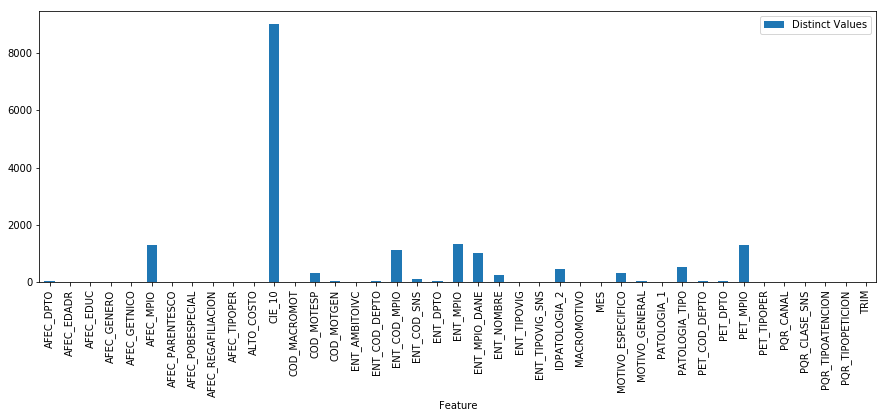

In [24]:
showFeaturesDistribution(getFeaturesDistribution(data.drop(['RIESGO_VIDA'], axis = 1)))

# Label's distribution

The labels shows a high uneven distribution. Resampling will be taked into account in the dataset preprocessing.

no    1841972
si    288811 
Name: RIESGO_VIDA, dtype: int64


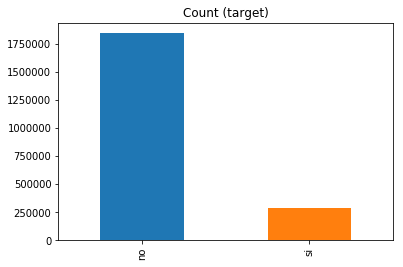

In [25]:
target_count = data['RIESGO_VIDA'].value_counts()
print(target_count)
target_count.plot(kind='bar', title='Count (target)');

## Store clean dataset

In [26]:
data.to_csv("datasets/dataset_clean.csv.gz", encoding='utf-8', compression = 'gzip')

In [29]:
display(data[['MACROMOTIVO']].drop_duplicates().sort_values(by=['MACROMOTIVO']))

,MACROMOTIVO
10,deficiencia en la efectividad de la atencion en salud.
390,falta de disponibilidad o inapropiado manejo del recursos humano y fisico para la atencion
12,insatisfaccion del usuario con el proceso administrativo
44,no reconocimiento de las prestaciones economicas.
240,"peticiones, quejas y reclamos interpeustas por ips-eps, entidades territoriales y organismos de control y vigilancia"
302764,"pqr interpuestas por vigilados, entidades intervenidas y organismos de control"
0,restriccion en el acceso a los servicios de salud
406399,solicitud de informacion a la superintendencia nacional de salud
403657,solicitud de informacion al contact center
